# Explore here

In [1]:
import requests
import pandas as pd

# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id":"CPIAUCSL",
    "api_key":"16dbd1bdceb90ffd932425b7e5c279fd",  
    "file_type":"json" 
}

def api_fed(url, parametros, realtime_start, realtime_end):

# Añadir fechas de busqueda 
    parametros["realtime_start"] = realtime_start
    parametros["realtime_end"] = realtime_end


# Realizar la solicitud GET
    response = requests.get(url, params=parametros)

    print(url)

# Verificar si la solicitud fue exitosa
    if response.status_code == 200:
    # Convertir la respuesta a formato JSON
        data = response.json()
    # Retorna la data 
        return data
    else:
        print(f"Error en la solicitud: {response.status_code}")


data = api_fed(url_fed,parametros_fed, "2021-01-01", "2023-12-31")

data_CPIAUCSL = pd.DataFrame(data)

data_CPIAUCSL.head(2)


https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1103,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1103,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [2]:
data_CPIAUCSL.columns

Index(['realtime_start', 'realtime_end', 'observation_start',
       'observation_end', 'units', 'output_type', 'file_type', 'order_by',
       'sort_order', 'count', 'offset', 'limit', 'observations'],
      dtype='object')

In [3]:
def obtener_observation_fed(data_CPIAUCSL):
    # Convertir la columna "observations" que contiene JSON en un DataFrame
    observations_data = pd.json_normalize(data_CPIAUCSL["observations"])
    
    # Concatenar el DataFrame original con el nuevo DataFrame de las observaciones
    data_CPIAUCSL = pd.concat([data_CPIAUCSL.drop(columns=["observations"]), observations_data], axis=1)

    return data_CPIAUCSL

# Ejecutar la función para obtener los datos procesados
data_CPIAUCSL = obtener_observation_fed(data_CPIAUCSL)

def guardar_csv(data , url_archivo):
    data.to_csv(url_archivo, index= True)




In [4]:
#data_fed_cpi.head(10)
data_CPIAUCSL.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
1101,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1103,0,100000,2023-11-14,2023-12-31,2023-10-01,307.619
1102,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,1103,0,100000,2023-12-12,2023-12-31,2023-11-01,307.917


In [5]:
guardar_csv(data_CPIAUCSL , "../data/raw/fed_CPIAUCSL_historical_data.csv")

Producto interno bruto='GNP"
Api_key='b55d1a0787bb20a7fcc6aef921343008'

In [6]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type"


# Parámetros de la solicitud
parametros_fed = {
    "series_id": "GNP",
    "api_key": "b55d1a0787bb20a7fcc6aef921343008",  
    "file_type": "json" 
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2023-12-31")

data_GNP = pd.DataFrame(data)

data_GNP.head(2)


https://api.stlouisfed.org/fred/series/observations?series_id&api_key&file_type


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,512,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,512,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [7]:
# Ejecutar la función para obtener los datos procesados
data_GNP = obtener_observation_fed(data_GNP)


In [8]:
#data_GNPCA.head(2)
data_GNP.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
510,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,512,0,100000,2023-11-29,2023-12-20,2023-07-01,27812.417
511,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,512,0,100000,2023-12-21,2023-12-31,2023-07-01,27774.189


In [9]:
guardar_csv(data_GNP,"../data/raw/fed_GNP_historical_data.csv")

Tasa de desempleo='UNRATE'
Api_key='8660234b709531d44271bbd9520353dd'

In [10]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "8660234b709531d44271bbd9520353dd",  
    "file_type": "json",
    "series_id": "UNRATE"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2023-12-31")

data_UNRATE = pd.DataFrame(data)

data_UNRATE.head(2)


https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,945,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,945,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [11]:
# Ejecutar la función para obtener los datos procesados
data_UNRATE = obtener_observation_fed(data_UNRATE)

In [12]:
data_UNRATE.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
943,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,945,0,100000,2023-11-03,2023-12-31,2023-10-01,3.9
944,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,945,0,100000,2023-12-08,2023-12-31,2023-11-01,3.7


In [13]:
guardar_csv(data_UNRATE,"../data/raw/fed_UNRATE_historical_data.csv")

Federal Funds Effective Rate (DFF)
Tasa de interes='DFF'
Api_key='78f1d1b71351546a936232d4d5469d80'

In [14]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "78f1d1b71351546a936232d4d5469d80",  
    "file_type": "json",
    "series_id": "DFF"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2023-12-31")

data_DFF= pd.DataFrame(data)

data_DFF.head(2)


https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25383,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25383,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [15]:
# Ejecutar la función para obtener los datos procesados
data_DFF = obtener_observation_fed(data_DFF)

In [16]:
data_DFF.tail(2)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
25381,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25383,0,100000,2023-12-28,2023-12-31,2023-12-27,5.33
25382,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,25383,0,100000,2023-12-29,2023-12-31,2023-12-28,5.33


In [17]:
guardar_csv(data_DFF,"../data/raw/fed_DFF_historical_data.csv")

Trade Balance: Goods and Services, Balance of Payments Basis (BOPGSTB)
Tasa de interes='BOPGSTB'
Api_key='58f82a464f9ab2bc239793f7ebb937f7'

In [18]:
# URL 
url_fed = "https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id"


# Parámetros de la solicitud
parametros_fed = {
    "api_key": "58f82a464f9ab2bc239793f7ebb937f7",  
    "file_type": "json",
    "series_id": "BOPGSTB"
}

data = api_fed(url_fed,parametros_fed, "2021-01-01", "2023-12-31")

data_BOPGSTB= pd.DataFrame(data)

data_BOPGSTB.head(2)

https://api.stlouisfed.org/fred/series/observations?api_key&file_type&series_id


,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,observations
0,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,769,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."
1,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,769,0,100000,"{'realtime_start': '2021-01-01', 'realtime_end..."


In [19]:
# Ejecutar la función para obtener los datos procesados
data_BOPGSTB = obtener_observation_fed(data_BOPGSTB)

In [20]:
data_BOPGSTB.tail(5)

,realtime_start,realtime_end,observation_start,observation_end,units,output_type,file_type,order_by,sort_order,count,offset,limit,realtime_start,realtime_end,date,value
764,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,769,0,100000,2023-11-07,2023-12-05,2023-08-01,-58657.0
765,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,769,0,100000,2023-12-06,2023-12-31,2023-08-01,-58624.0
766,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,769,0,100000,2023-11-07,2023-12-05,2023-09-01,-61542.0
767,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,769,0,100000,2023-12-06,2023-12-31,2023-09-01,-61151.0
768,2021-01-01,2023-12-31,1600-01-01,9999-12-31,lin,1,json,observation_date,asc,769,0,100000,2023-12-06,2023-12-31,2023-10-01,-64255.0


In [21]:
guardar_csv(data_BOPGSTB,"../data/raw/fed_BOPGSTB_historical_data.csv")

Seleccionar solo las columnas de 'date' y 'value, agregar una más con el nombre de la variable

In [22]:
df_CPIAUCSL = data_CPIAUCSL[['date','value']].copy()
df_CPIAUCSL['date'] = pd.to_datetime(df_CPIAUCSL['date'])
df_CPIAUCSL['value'] = pd.to_numeric(df_CPIAUCSL['value'], errors='coerce')
df_CPIAUCSL['value'] = df_CPIAUCSL['value'].apply(lambda x: x*1000 if x < 500 else x)
df_CPIAUCSL['IPC_value'] = df_CPIAUCSL['value']
df_CPIAUCSL = df_CPIAUCSL.drop('value', axis=1)
df_CPIAUCSL = df_CPIAUCSL.drop_duplicates(subset=['date'], keep='last')
df_CPIAUCSL.set_index('date', inplace=True)

# Cambiar la frecuencia a diaria y rellenar con NaN
df_IPC_D = df_CPIAUCSL.resample('D').asfreq()

# Función personalizada para interpolar el valor y calcular variación diaria
def interpolar_valor(df_CPIAUCSL):
    # Interpolar valores entre meses
    df_interpolado = df_CPIAUCSL.resample('D').interpolate(method='linear')
    
    # Calcular la variación diaria como porcentaje
    df_interpolado['IPC_var'] = df_interpolado['IPC_value'].pct_change().round(5) * 100
    
    return df_interpolado

# Aplicar la función a los datos diarios
df_IPC_D = interpolar_valor(df_CPIAUCSL)

#df_IPC_D = df_IPC_D[(df_IPC_D['date'] >= '2021-01-01') & (df_IPC_D['date'] <= '2023-12-31')]
df_IPC_D

,IPC_value,IPC_var
date,,
1947-01-01,21480.000000,NaN
1947-01-02,21484.516129,0.021
1947-01-03,21489.032258,0.021
1947-01-04,21493.548387,0.021
1947-01-05,21498.064516,0.021
...,...,...
2023-10-28,307878.548387,0.003
2023-10-29,307888.161290,0.003
2023-10-30,307897.774194,0.003


In [23]:
df_BOPGSTBL = data_BOPGSTB[['date','value']].copy()
df_BOPGSTBL['date'] = pd.to_datetime(df_BOPGSTBL['date'])
df_BOPGSTBL['value'] = pd.to_numeric(df_BOPGSTBL['value'], errors='coerce')
df_BOPGSTBL['BC_value'] = df_BOPGSTBL['value'].apply(lambda x: x/100000000000 if x < -200000 else x)
df_BOPGSTBL = df_BOPGSTBL.drop('value', axis=1)
df_BOPGSTBL = df_BOPGSTBL.drop_duplicates(subset=['date'], keep='last')
df_BOPGSTBL.set_index('date', inplace=True)

df_BC_D = df_BOPGSTBL.resample('D').asfreq()
df_BC_D = df_BC_D.resample('D').interpolate(method='linear')
df_BC_D['BC_var'] = df_BC_D['BC_value'].pct_change().round(5) * 100
 
df_BC_D

,BC_value,BC_var
date,,
1992-01-01,-2026.000000,NaN
1992-01-02,-1987.451613,-1.903
1992-01-03,-1948.903226,-1.940
1992-01-04,-1910.354839,-1.978
1992-01-05,-1871.806452,-2.018
...,...,...
2023-09-27,-63841.133333,0.162
2023-09-28,-63944.600000,0.162
2023-09-29,-64048.066667,0.162


In [24]:
df_DFF = data_DFF[['date','value']].copy()

df_DFF['date'] = pd.to_datetime(df_DFF['date'])
df_DFF['value'] = pd.to_numeric(df_DFF['value'], errors='coerce')
df_DFF['TPM_value'] = df_DFF['value']
df_DFF['TPM_var'] = df_DFF['value'].pct_change().round(5) * 100
df_DFF = df_DFF.drop('value', axis=1)
df_DFF = df_DFF.drop_duplicates(subset=['date'], keep='last')
df_DFF.set_index('date', inplace=True)

df_DFF

,TPM_value,TPM_var
date,,
1954-07-01,1.13,NaN
1954-07-02,1.25,10.619
1954-07-03,1.25,0.000
1954-07-04,1.25,0.000
1954-07-05,0.88,-29.600
...,...,...
2023-12-24,5.33,0.000
2023-12-25,5.33,0.000
2023-12-26,5.33,0.000


In [25]:
df_GNP = data_GNP[['date','value']].copy()
df_GNP['date'] = pd.to_datetime(df_GNP['date'])
df_GNP['value'] = pd.to_numeric(df_GNP['value'], errors='coerce')
df_GNP['PIB_value'] = df_GNP['value'].apply(lambda x: x*1000 if x < 30000 else x)
df_GNP = df_GNP.drop('value', axis=1)
df_GNP = df_GNP.drop_duplicates(subset=['date'], keep='last')
df_GNP.set_index('date', inplace=True)

df_PIB_D = df_GNP.resample('D').asfreq()
df_PIB_D = df_PIB_D.resample('D').interpolate(method='linear')
df_PIB_D['PIB_var'] = df_PIB_D['PIB_value'].pct_change().round(5) * 100

df_PIB_D

,PIB_value,PIB_var
date,,
1939-01-01,NaN,NaN
1939-01-02,NaN,NaN
1939-01-03,NaN,NaN
1939-01-04,NaN,NaN
1939-01-05,NaN,NaN
...,...,...
2023-06-27,2.775054e+07,0.021
2023-06-28,2.775645e+07,0.021
2023-06-29,2.776236e+07,0.021


In [26]:
df_UNRATE = data_UNRATE[['date','value']].copy()
df_UNRATE['date'] = pd.to_datetime(df_UNRATE['date'])
df_UNRATE['value'] = pd.to_numeric(df_UNRATE['value'], errors='coerce')
df_UNRATE['TDES_value'] = df_UNRATE['value']
df_UNRATE = df_UNRATE.drop('value', axis=1)
df_UNRATE = df_UNRATE.drop_duplicates(subset=['date'], keep='last')
df_UNRATE.set_index('date', inplace=True)
df_TDES_D = df_UNRATE.resample('D').asfreq()
df_TDES_D = df_TDES_D.resample('D').interpolate(method='linear')
df_TDES_D['TDES_var'] = df_TDES_D['TDES_value'].pct_change().round(5) * 100

df_TDES_D

,TDES_value,TDES_var
date,,
1948-01-01,3.400000,NaN
1948-01-02,3.412903,0.380
1948-01-03,3.425806,0.378
1948-01-04,3.438710,0.377
1948-01-05,3.451613,0.375
...,...,...
2023-10-28,3.725806,-0.173
2023-10-29,3.719355,-0.173
2023-10-30,3.712903,-0.173


Guardar df's en carpeta processed, tienen solo las columnas valor, date y nombre

In [27]:
guardar_csv(df_BC_D,"../data/processed/df_balanzacomercial_diario.csv")
guardar_csv(df_IPC_D,"../data/processed/df_indicepreciosconsumidor_diario.csv")
guardar_csv(df_DFF,"../data/processed/df_tasainteres_diario.csv")
guardar_csv(df_PIB_D,"../data/processed/df_productointernobruto_diario.csv")
guardar_csv(df_TDES_D,"../data/processed/df_tasadesempleo_diario.csv")

Consolidar los df's en uno solo, porque comparten las mismas columnas

Guardar dataframe consolidado

### Valor de los activos 

In [28]:
import requests
import csv
import json
from datetime import datetime, timedelta

# API Key de Polygon.io
key_activos = '2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI'

# Símbolos de los activos
activos = {      
    'VTI': 'VTI',          
    'Oro': 'C:XAUUSD',       
    'Bitcoin': 'X:BTCUSD'    
}

# Función para consultar datos históricos de un activo
def api_activos(key_activos, activo, timespan='day', start_date=None, end_date=None):
    # URL de la API para obtener los datos históricos
    url = f'https://api.polygon.io/v2/aggs/ticker/{activo}/range/1/{timespan}/{start_date}/{end_date}?adjusted=true&sort=asc&apiKey={key_activos}'
    
    # Hacer la solicitud GET a la API de Polygon.io
    response = requests.get(url)
    print(url)

    # Verificar si la solicitud fue exitosa
    if response.status_code == 200:
        # Convertir la respuesta a formato JSON
        data = response.json()
        print ("bien")

        if 'results' in data:
            return data['results']  # Devolver solo los resultados
        else:
            print("No se encontraron resultados en la respuesta.")
            return []
    else:
        print(f"Error en la solicitud: {response.status_code}")
        return []


# Llamar a la función para cada activo y guardar los datos en archivos CSV separados

# Obtener y guardar datos del VTI
historical_data_vti = api_activos(key_activos, activos['VTI'], 'day', "2021-01-01", "2023-12-31")
vti = pd.DataFrame(historical_data_vti)
guardar_csv(vti, '../data/VTI_historical_data.csv')




https://api.polygon.io/v2/aggs/ticker/VTI/range/1/day/2021-01-01/2023-12-31?adjusted=true&sort=asc&apiKey=2T0PMe4qTXopT2r7lymhHfrBvMNhx6VI
bien


In [29]:

# convertir a fecha 

vti['t'] = pd.to_datetime(vti['t'], unit='ms').dt.strftime('%Y-%m-%d')
vti

,v,vw,o,c,h,l,t,n
0,3981594.0,196.1325,194.3500,198.14,198.3100,193.6500,2022-11-10,63249
1,4550171.0,199.1410,198.5800,200.16,200.7000,197.8200,2022-11-11,55987
2,4248218.0,199.7847,199.2600,198.35,200.9200,198.2100,2022-11-14,72199
3,4605700.0,200.6384,201.5000,200.36,202.1400,198.3400,2022-11-15,74446
4,2904962.0,198.6937,199.4500,198.32,199.7200,198.0300,2022-11-16,58235
...,...,...,...,...,...,...,...,...
280,3662383.0,236.8428,236.5896,236.63,237.5150,235.6400,2023-12-22,60667
281,3829400.0,237.5316,236.9800,237.80,238.3100,236.8559,2023-12-26,59244
282,5103732.0,237.9578,238.0000,238.25,238.4400,237.4700,2023-12-27,62196
283,4099416.0,238.4654,238.2500,238.13,238.7399,238.1300,2023-12-28,78091


In [30]:
vti.drop(['v', 'vw', 'o', 'h', 'l', 'n'], axis = 1, inplace = True)


In [31]:
vti

,c,t
0,198.14,2022-11-10
1,200.16,2022-11-11
2,198.35,2022-11-14
3,200.36,2022-11-15
4,198.32,2022-11-16
...,...,...
280,236.63,2023-12-22
281,237.80,2023-12-26
282,238.25,2023-12-27
283,238.13,2023-12-28


In [32]:
vti

,c,t
0,198.14,2022-11-10
1,200.16,2022-11-11
2,198.35,2022-11-14
3,200.36,2022-11-15
4,198.32,2022-11-16
...,...,...
280,236.63,2023-12-22
281,237.80,2023-12-26
282,238.25,2023-12-27
283,238.13,2023-12-28


In [33]:
vti = vti.rename(columns = {'c' : 'VTI_value'})
vti = vti.rename(columns = {'t' : 'date'})



In [34]:
# Calcular el valor del VTI cinco días antes y añadirlo al DataFrame

vti['VTI_6_days_ago'] = vti['VTI_value'].shift(6)

In [35]:
vti['pct_change_6d'] = vti['VTI_6_days_ago'].pct_change(6) * 100

In [36]:
vti = vti.set_index("date")

vti

,VTI_value,VTI_6_days_ago,pct_change_6d
date,,,
2022-11-10,198.14,NaN,NaN
2022-11-11,200.16,NaN,NaN
2022-11-14,198.35,NaN,NaN
2022-11-15,200.36,NaN,NaN
2022-11-16,198.32,NaN,NaN
...,...,...,...
2023-12-22,236.63,235.63,4.284134
2023-12-26,237.80,235.31,3.314893
2023-12-27,238.25,236.33,3.268516


In [37]:
# Crear un rango de fechas para el índice
fecha_inicio = '2022-11-29'
fecha_fin = '2023-12-31'

rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')


# Crear el DataFrame base con el índice de fechas
df_indicadores_D = pd.DataFrame(index=rango_fechas)

# Llenar el DataFrame base con datos de otros DataFrames
df_indicadores_D = df_indicadores_D.join(df_DFF, how='left')
df_indicadores_D = df_indicadores_D.join(df_TDES_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_IPC_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_PIB_D, how='left')
df_indicadores_D = df_indicadores_D.join(df_BC_D, how='left')


df_indicadores_D

,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
2022-11-29,3.83,0.0,3.506667,-0.095,298963.866667,0.004,2.683675e+07,0.015,-70881.466667,0.357
2022-11-30,3.83,0.0,3.503333,-0.095,298976.933333,0.004,2.684087e+07,0.015,-71133.733333,0.356
2022-12-01,3.83,0.0,3.500000,-0.095,298990.000000,0.004,2.684498e+07,0.015,-71386.000000,0.355
2022-12-02,3.83,0.0,3.496774,-0.092,299039.870968,0.017,2.684909e+07,0.015,-71366.322581,-0.028
2022-12-03,3.83,0.0,3.493548,-0.092,299089.741935,0.017,2.685321e+07,0.015,-71346.645161,-0.028
...,...,...,...,...,...,...,...,...,...,...
2023-12-27,5.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,5.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_indicadores_D.index= pd.to_datetime(df_indicadores_D.index, unit='ms').strftime('%Y-%m-%d')

In [39]:
df_indicadores_D = df_indicadores_D.join(vti, how = 'left')

df_indicadores_D

,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var,VTI_value,VTI_6_days_ago,pct_change_6d
2022-11-29,3.83,0.0,3.506667,-0.095,298963.866667,0.004,2.683675e+07,0.015,-70881.466667,0.357,197.96,198.42,0.141314
2022-11-30,3.83,0.0,3.503333,-0.095,298976.933333,0.004,2.684087e+07,0.015,-71133.733333,0.356,204.06,197.58,-1.288969
2022-12-01,3.83,0.0,3.500000,-0.095,298990.000000,0.004,2.684498e+07,0.015,-71386.000000,0.355,204.18,200.17,0.917570
2022-12-02,3.83,0.0,3.496774,-0.092,299039.870968,0.017,2.684909e+07,0.015,-71366.322581,-0.028,203.99,201.39,0.514075
2022-12-03,3.83,0.0,3.493548,-0.092,299089.741935,0.017,2.685321e+07,0.015,-71346.645161,-0.028,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,5.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.25,236.33,3.268516
2023-12-28,5.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,238.13,238.06,3.598938
2023-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.22,234.51,1.669123
2023-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df_indicadores_D = df_indicadores_D [['VTI_value', 'VTI_6_days_ago', 'pct_change_6d', 'TPM_value', 'TPM_var','TDES_value', 'TDES_var', 'IPC_value', 'IPC_var', 'PIB_value', 'PIB_var', 'BC_value', 'BC_var']]

df_indicadores_D

,VTI_value,VTI_6_days_ago,pct_change_6d,TPM_value,TPM_var,TDES_value,TDES_var,IPC_value,IPC_var,PIB_value,PIB_var,BC_value,BC_var
2022-11-29,197.96,198.42,0.141314,3.83,0.0,3.506667,-0.095,298963.866667,0.004,2.683675e+07,0.015,-70881.466667,0.357
2022-11-30,204.06,197.58,-1.288969,3.83,0.0,3.503333,-0.095,298976.933333,0.004,2.684087e+07,0.015,-71133.733333,0.356
2022-12-01,204.18,200.17,0.917570,3.83,0.0,3.500000,-0.095,298990.000000,0.004,2.684498e+07,0.015,-71386.000000,0.355
2022-12-02,203.99,201.39,0.514075,3.83,0.0,3.496774,-0.092,299039.870968,0.017,2.684909e+07,0.015,-71366.322581,-0.028
2022-12-03,NaN,NaN,NaN,3.83,0.0,3.493548,-0.092,299089.741935,0.017,2.685321e+07,0.015,-71346.645161,-0.028
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,238.25,236.33,3.268516,5.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-28,238.13,238.06,3.598938,5.33,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-29,237.22,234.51,1.669123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
guardar_csv(df_indicadores_D,"../data/processed/total_data.csv")

In [42]:
# Eliminar filas donde 'columna_objetivo' es NaN
df_indicadores_D = df_indicadores_D.dropna(subset=['VTI_value'])
# Reemplazar NaN con el valor anterior en cada columna

df_indicadores_D = df_indicadores_D.ffill()
df_indicadores_D.info()

<class 'pandas.core.frame.DataFrame'>
Index: 273 entries, 2022-11-29 to 2023-12-29
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   VTI_value       273 non-null    float64
 1   VTI_6_days_ago  273 non-null    float64
 2   pct_change_6d   273 non-null    float64
 3   TPM_value       273 non-null    float64
 4   TPM_var         273 non-null    float64
 5   TDES_value      273 non-null    float64
 6   TDES_var        273 non-null    float64
 7   IPC_value       273 non-null    float64
 8   IPC_var         273 non-null    float64
 9   PIB_value       273 non-null    float64
 10  PIB_var         273 non-null    float64
 11  BC_value        273 non-null    float64
 12  BC_var          273 non-null    float64
dtypes: float64(13)
memory usage: 29.9+ KB


In [43]:
#Variables a eliminar
df_indicadores_D = df_indicadores_D.drop(['VTI_6_days_ago','PIB_value','PIB_var','BC_value','TDES_value','TPM_value'],axis=1)

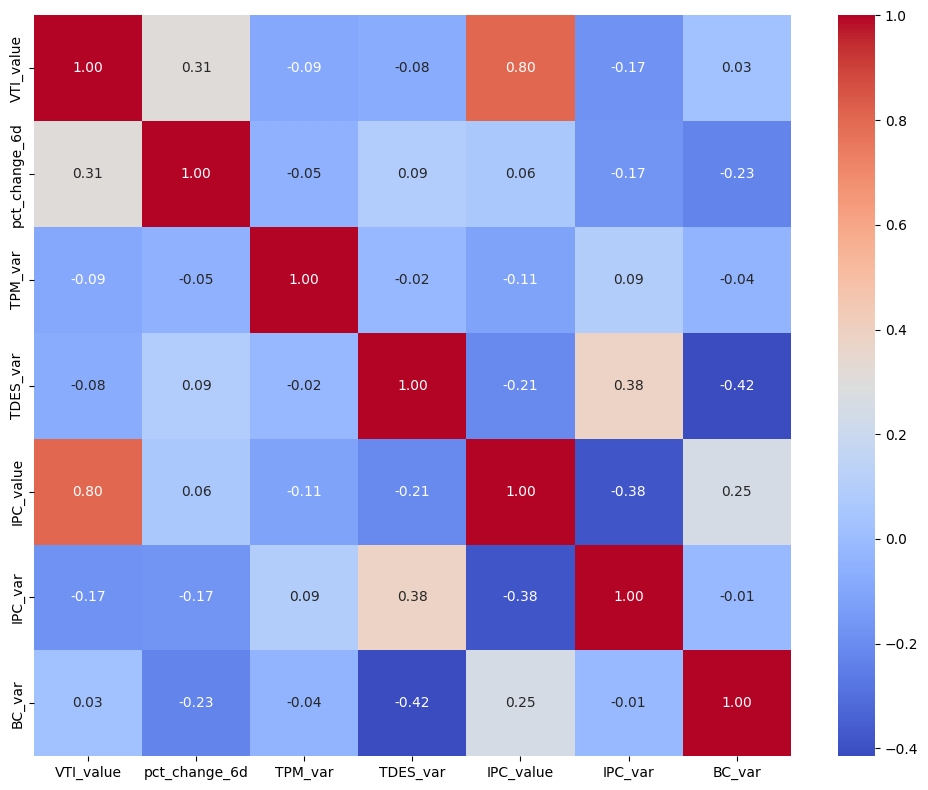

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
matriz_correlacion = df_indicadores_D.corr()

# Ajustar el tamaño de la figura y el formato de los números en el heatmap
plt.figure(figsize=(10, 8))  # Ajusta el tamaño según lo necesites
sns.heatmap(matriz_correlacion, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

# Mejorar el espaciado
plt.tight_layout()
plt.show()

In [45]:
df_indicadores_D.columns


Index(['VTI_value', 'pct_change_6d', 'TPM_var', 'TDES_var', 'IPC_value',
       'IPC_var', 'BC_var'],
      dtype='object')

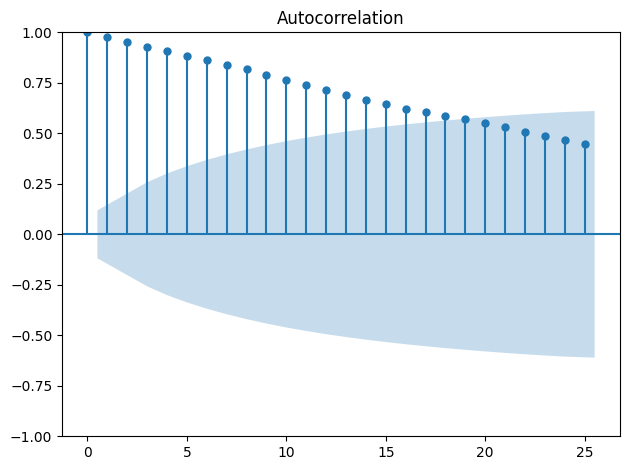

In [46]:
# Autocorrelación
from statsmodels.graphics.tsaplots import plot_acf
df_auto_vti = df_indicadores_D['VTI_value']
plot_acf(df_auto_vti)

plt.tight_layout()

plt.show()

In [47]:
df_indicadores_D = df_indicadores_D.reset_index()
df_indicadores_D.rename(columns={'index': 'date'}, inplace=True)
df_indicadores_D['date'] = pd.to_datetime(df_indicadores_D['date']).dt.date

df_indicadores_D.head(7)

,date,VTI_value,pct_change_6d,TPM_var,TDES_var,IPC_value,IPC_var,BC_var
0,2022-11-29,197.96,0.141314,0.0,-0.095,298963.866667,0.004,0.357
1,2022-11-30,204.06,-1.288969,0.0,-0.095,298976.933333,0.004,0.356
2,2022-12-01,204.18,0.917570,0.0,-0.095,298990.000000,0.004,0.355
3,2022-12-02,203.99,0.514075,0.0,-0.092,299039.870968,0.017,-0.028
4,2022-12-05,199.98,1.623639,0.0,-0.092,299189.483871,0.017,-0.028
5,2022-12-06,196.98,0.394957,0.0,-0.093,299239.354839,0.017,-0.028
6,2022-12-07,196.66,-0.231831,0.0,-0.093,299289.225806,0.017,-0.028


Modelos de series temporales multivariantes

In [48]:
feature_columns = [
    'IPC_value',
    'pct_change_6d',
    'TPM_var',
    'TDES_var', 
    'IPC_var',
    'BC_var'
]
target_column = ['VTI_value']

train_size = int(0.85 * len(df_indicadores_D))

multivariate_df = df_indicadores_D[['date'] + target_column + feature_columns].copy()
multivariate_df.columns = ['ds', 'y'] + feature_columns

train = multivariate_df.iloc[:train_size, :]
x_train, y_train = pd.DataFrame(multivariate_df.iloc[:train_size, [0,2,3,4,5,6,7]]), pd.DataFrame(multivariate_df.iloc[:train_size, 1])
x_valid, y_valid = pd.DataFrame(multivariate_df.iloc[train_size:, [0,2,3,4,5,6,7]]), pd.DataFrame(multivariate_df.iloc[train_size:, 1])

train

,ds,y,IPC_value,pct_change_6d,TPM_var,TDES_var,IPC_var,BC_var
0,2022-11-29,197.96,298963.866667,0.141314,0.0,-0.095,0.004,0.357
1,2022-11-30,204.06,298976.933333,-1.288969,0.0,-0.095,0.004,0.356
2,2022-12-01,204.18,298990.000000,0.917570,0.0,-0.095,0.004,0.355
3,2022-12-02,203.99,299039.870968,0.514075,0.0,-0.092,0.017,-0.028
4,2022-12-05,199.98,299189.483871,1.623639,0.0,-0.092,0.017,-0.028
...,...,...,...,...,...,...,...,...
227,2023-10-25,206.36,307849.709677,0.928605,0.0,-0.172,0.003,0.162
228,2023-10-26,204.22,307859.322581,-1.177944,0.0,-0.172,0.003,0.162
229,2023-10-27,203.12,307868.935484,-2.494457,0.0,-0.173,0.003,0.162
230,2023-10-30,205.46,307897.774194,-2.919810,0.0,-0.173,0.003,0.162


5.2.1 Multivariate Prophet

In [49]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math
from colorama import Fore

# Train the model
model = Prophet()
model.add_regressor('IPC_value')
model.add_regressor('pct_change_6d')
model.add_regressor('TPM_var')
model.add_regressor('TDES_var')
model.add_regressor('IPC_var')
model.add_regressor('BC_var')

# Fit the model with train set
model.fit(train)

# Predict on valid set
y_pred = model.predict(x_valid)

# Calcuate metrics
score_mae = mean_absolute_error(y_valid, y_pred['yhat'])
score_rmse = math.sqrt(mean_squared_error(y_valid, y_pred['yhat']))

print(Fore.GREEN + 'RMSE: {}'.format(score_rmse))

Importing plotly failed. Interactive plots will not work.
14:03:13 - cmdstanpy - INFO - Chain [1] start processing
14:03:13 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 28.410648708632888


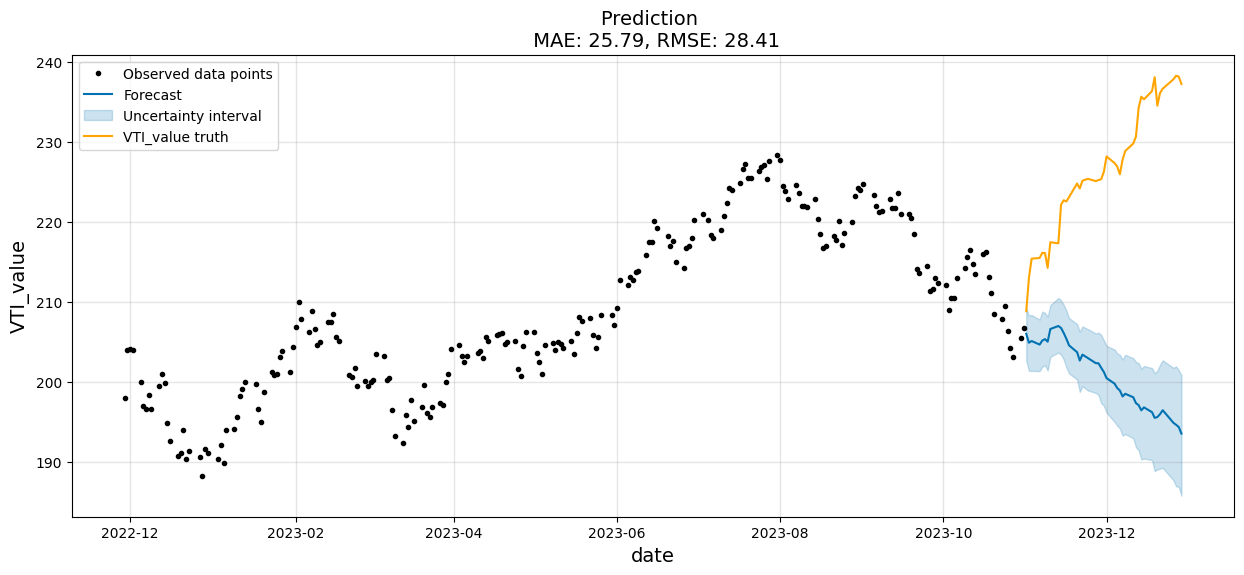

In [50]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(6)
f.set_figwidth(15)

model.plot(y_pred, ax=ax)
sns.lineplot(x=x_valid['ds'], y=y_valid['y'], ax=ax, color='orange', label='VTI_value truth') #navajowhite

ax.set_title(f'Prediction \n MAE: {score_mae:.2f}, RMSE: {score_rmse:.2f}', fontsize=14)
ax.set_xlabel(xlabel='date', fontsize=14)
ax.set_ylabel(ylabel='VTI_value', fontsize=14)

plt.show()